#### ML Modeling

In [1]:
import pandas as pd

# 사용할 모델
from sklearn.linear_model import Lasso, Ridge, LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import ElasticNet
from xgboost import XGBRegressor
import lightgbm as lgb

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt
from freeman.plt_setting import plt_settings
from freeman.evaluation import regression_evaluation, f_importances, plot_actual_pred
from freeman.aiddd.data_manager import read_data

plt_settings()

In [2]:
df_X = read_data('2a-all-scaled-X1', process_seq='4th')
df_y = read_data('2a-all-y1', process_seq='4th')

In [3]:
training_columns = df_X.columns

X_train, X_test, y_train, y_test = \
    train_test_split(df_X, df_y, test_size=0.2)
    
X_test_copy = X_test.copy()

In [4]:
SEED = 123
ml_models = {
    'LIN': LinearRegression(),
    'LASSO': Lasso(),
    'RIDGE': Ridge(),
    'KNR': KNeighborsRegressor(),
    'DTR': DecisionTreeRegressor(),
    'RFR': RandomForestRegressor(n_estimators=200, n_jobs=-1, random_state=SEED),
    'GBR': GradientBoostingRegressor(),
    'EN': ElasticNet(alpha=0.1, l1_ratio=0.5, random_state=SEED),
    'XGR': XGBRegressor(eta=0.01, n_estimators=100, n_jobs=-1),
}

In [5]:
def diff_ytest_pred(model_key, test, pred):
    test = test['total_cons_cost'].values.tolist()
    pred = pred.tolist()
    if isinstance(pred[0], list):
        pred = [item for sub in pred for item in sub]
    max_test = max(test)
    loop_size = len(test)
    result_mape = []
    result_max_mape = []
    for idx in range(loop_size):
        new_mape = abs((test[idx] - pred[idx])/test[idx])*100
        new_max_mape = abs((test[idx] - pred[idx])/(test[idx]+max_test))*100
        result_mape.append(new_mape)
        result_max_mape.append(new_max_mape)
    X_test_copy[f'{model_key}_mape'] = result_mape
    X_test_copy[f'{model_key}_max_mape'] = result_max_mape

In [6]:
def model_fit_and_evaluation(model_key, display_start=0, display_size=50):
    model = ml_models[model_key]
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    print(f'Evaluation: {model_key}')
    evaluation_value = regression_evaluation(y_test, predictions)
    evaluation_values.append(evaluation_value)
    model_names.append(model_key)
    diff_ytest_pred(model_key, y_test, predictions)
    try:
        f_importances(model, training_columns, model_key)
    except AttributeError as e:
        print(f'`{model_key}` object has no attribute `feature_importances_`')
    plot_actual_pred(
        y_test[display_start:display_start+display_size],
        predictions[display_start:display_start+display_size],
        model_key
    )

Evaluation: LIN
R2_SCORE: -91208989230135485470343168.000000, MAPE: 8749630702889.444336, MSE: 353796141319088369890164004754169004032.000000, RMSE: 18809469458735095808.000000, MAE: 656126455142980480.000000
`LIN` object has no attribute `feature_importances_`


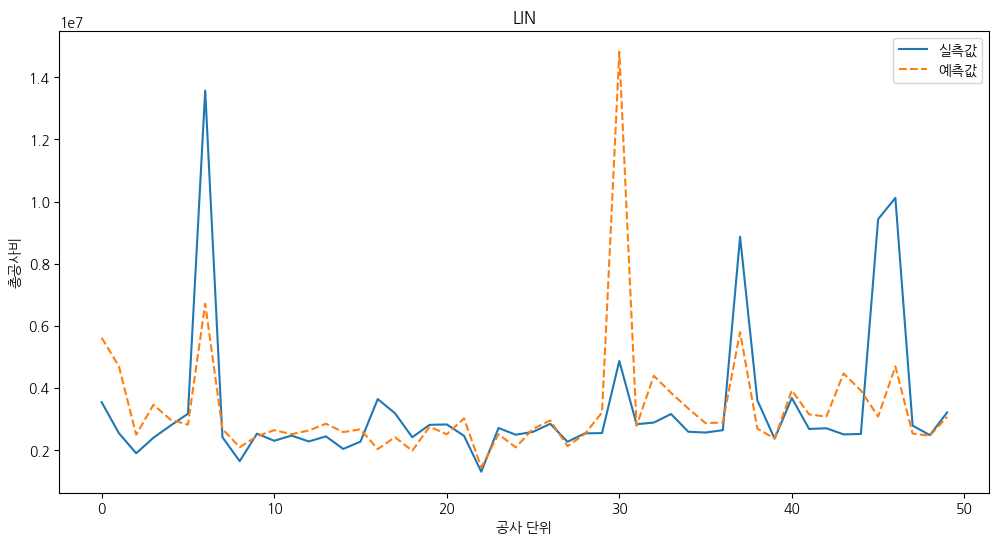

Evaluation: LASSO
R2_SCORE: 0.317778, MAPE: 20.621349, MSE: 2646311193389.520508, RMSE: 1626748.657104, MAE: 759606.200238
`LASSO` object has no attribute `feature_importances_`


/home/freeman/anaconda3/envs/t213p310/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.091e+15, tolerance: 2.732e+12
  model = cd_fast.enet_coordinate_descent(


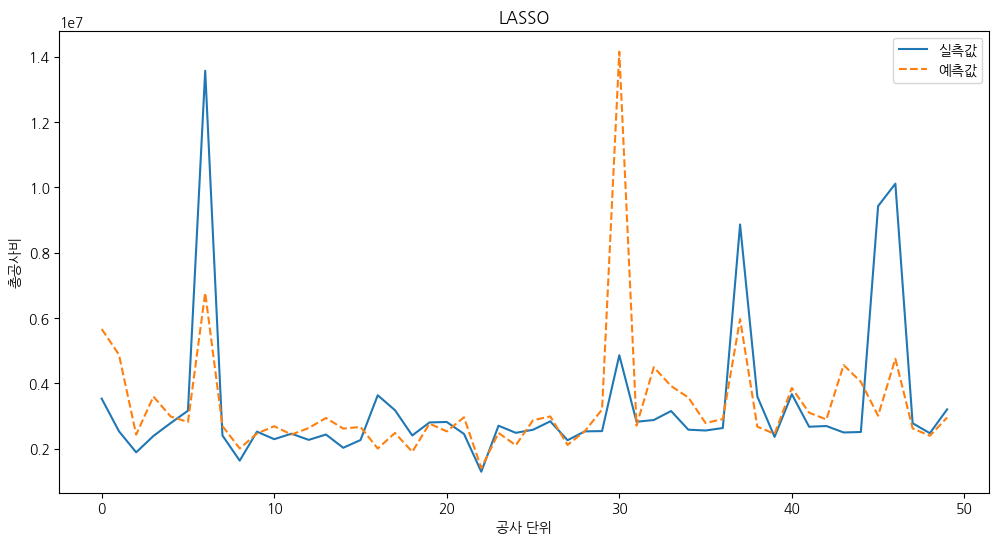

Evaluation: RIDGE
R2_SCORE: 0.323194, MAPE: 20.612096, MSE: 2625304513433.957031, RMSE: 1620279.146763, MAE: 758575.355842
`RIDGE` object has no attribute `feature_importances_`


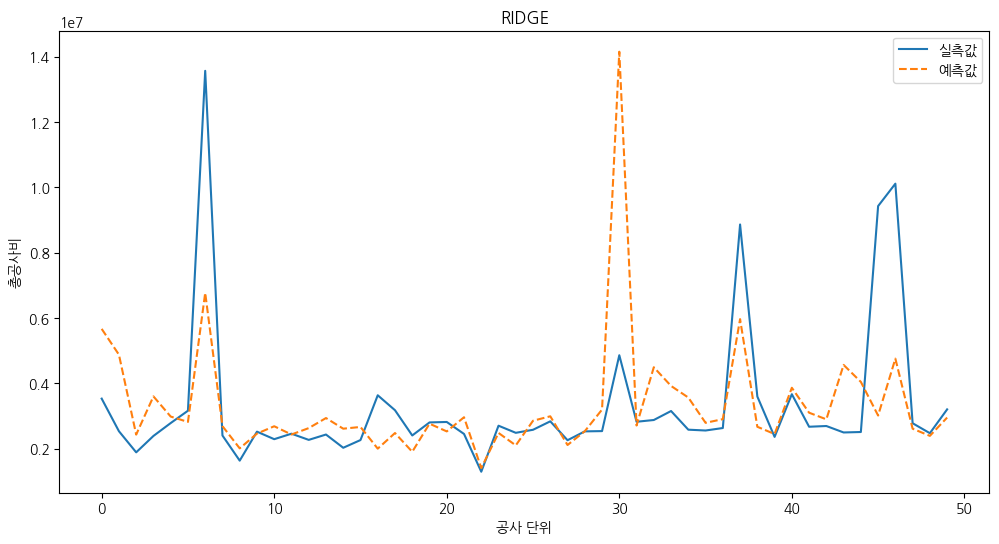

Evaluation: KNR
R2_SCORE: 0.243052, MAPE: 21.539538, MSE: 2936171494792.587402, RMSE: 1713526.041469, MAE: 808852.208690
`KNR` object has no attribute `feature_importances_`


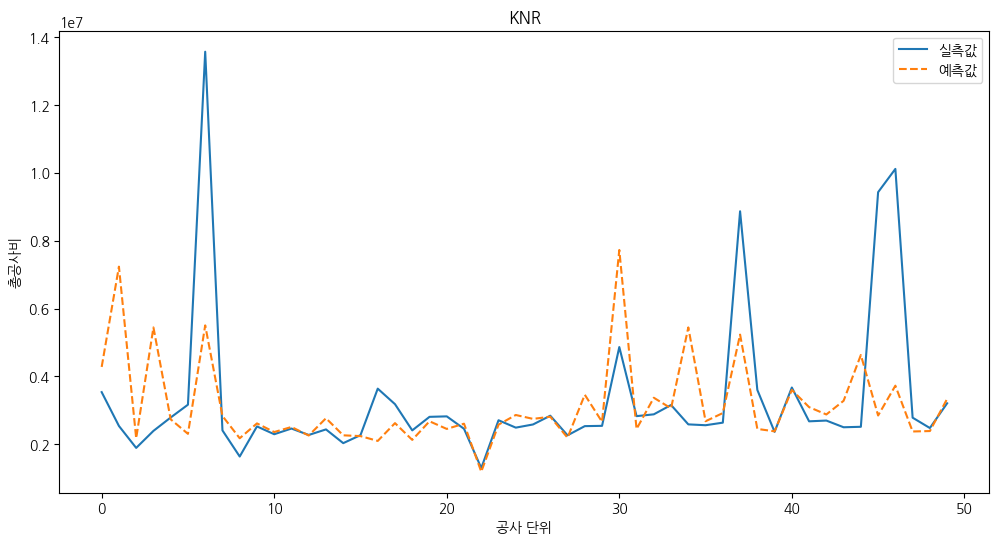

Evaluation: DTR
R2_SCORE: -0.536003, MAPE: 28.077356, MSE: 5958096309779.562500, RMSE: 2440921.201059, MAE: 1037031.310251


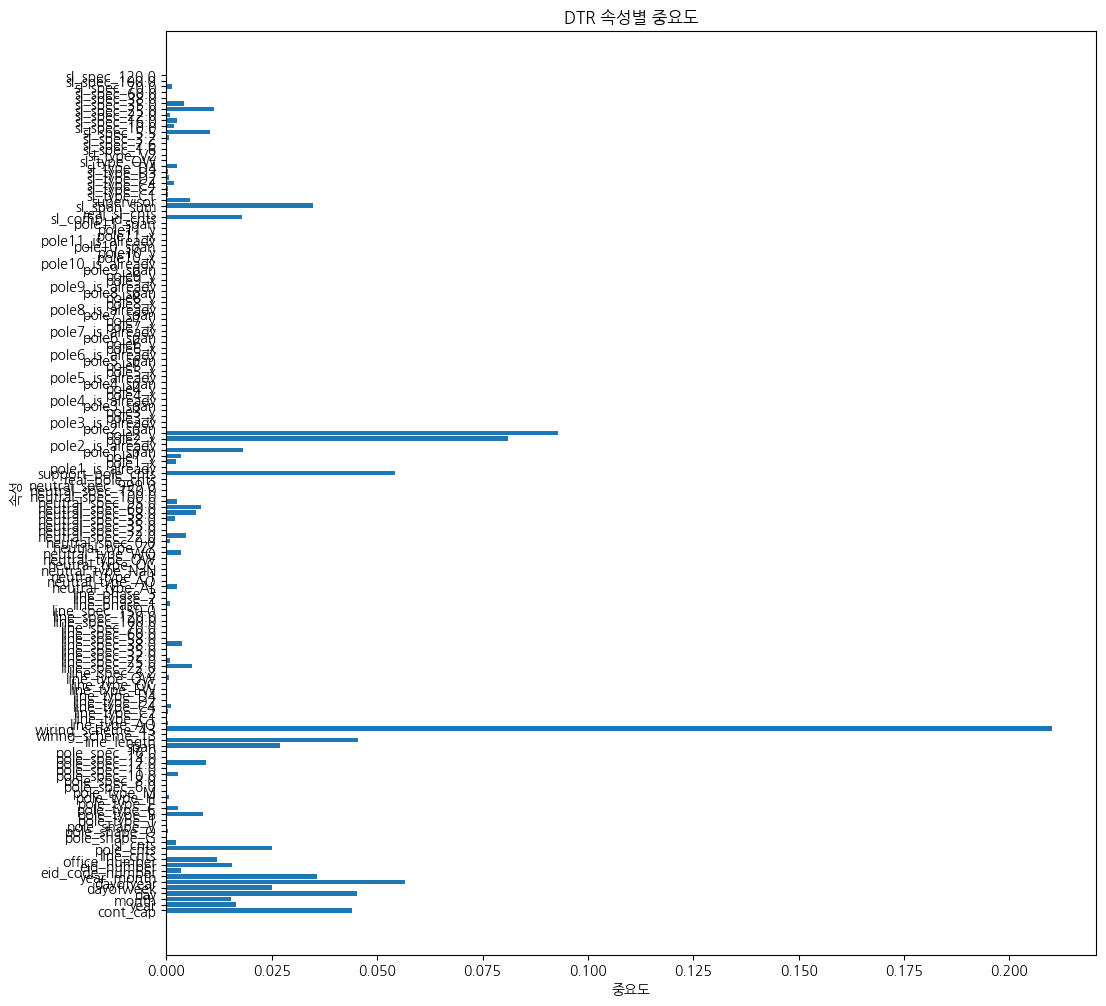

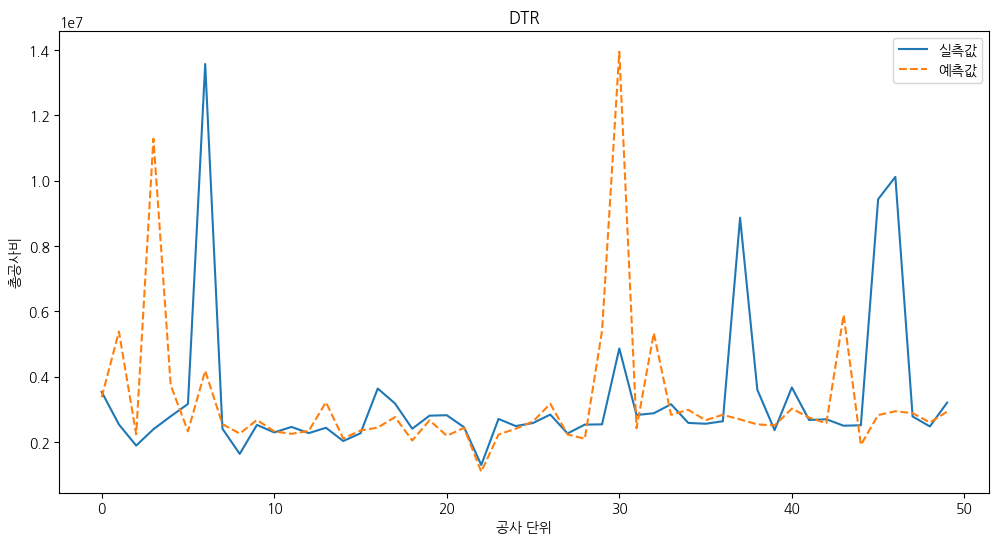

/home/freeman/anaconda3/envs/t213p310/lib/python3.10/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Evaluation: RFR
R2_SCORE: 0.342664, MAPE: 20.483789, MSE: 2549781442277.026367, RMSE: 1596803.507723, MAE: 755993.197390


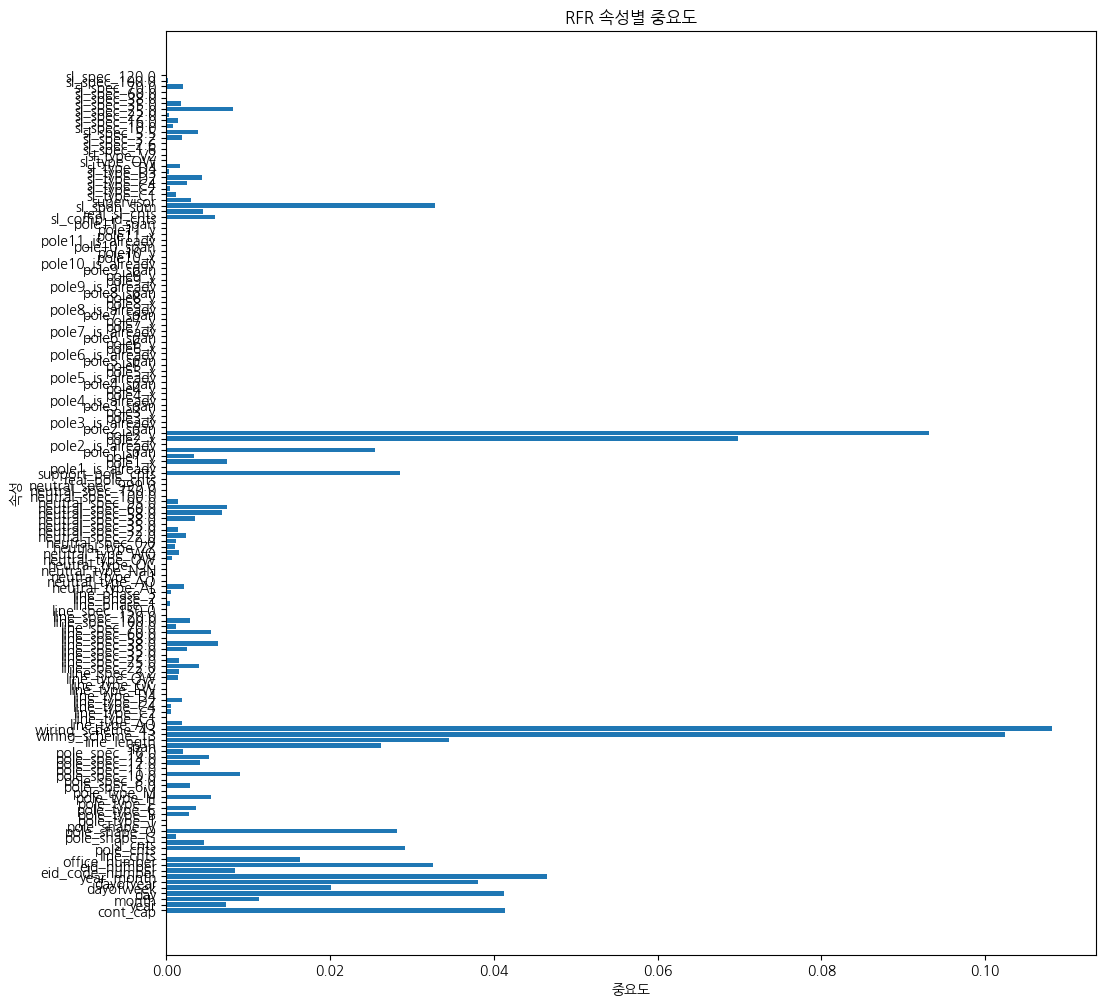

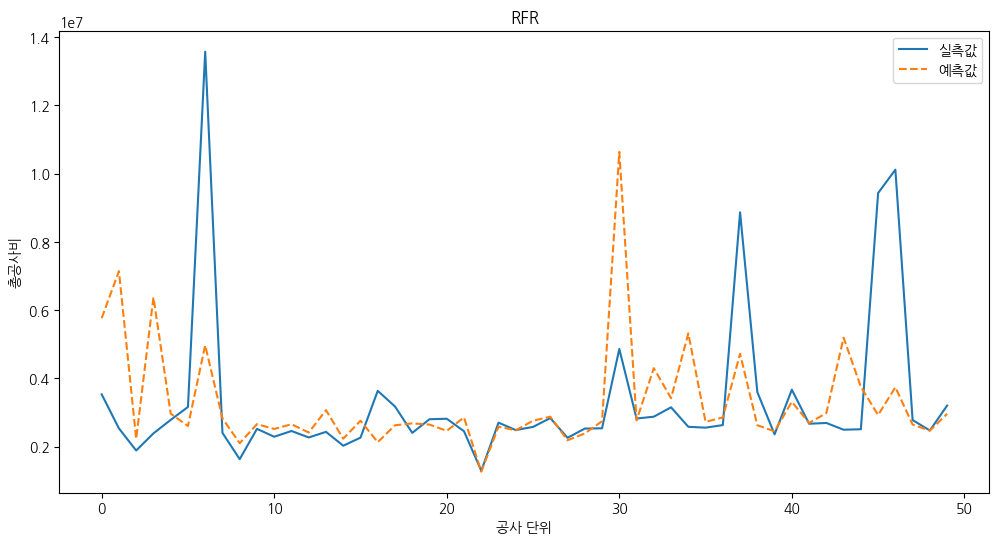

/home/freeman/anaconda3/envs/t213p310/lib/python3.10/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Evaluation: GBR
R2_SCORE: 0.401511, MAPE: 19.956117, MSE: 2321515905504.926270, RMSE: 1523652.160273, MAE: 724716.555951


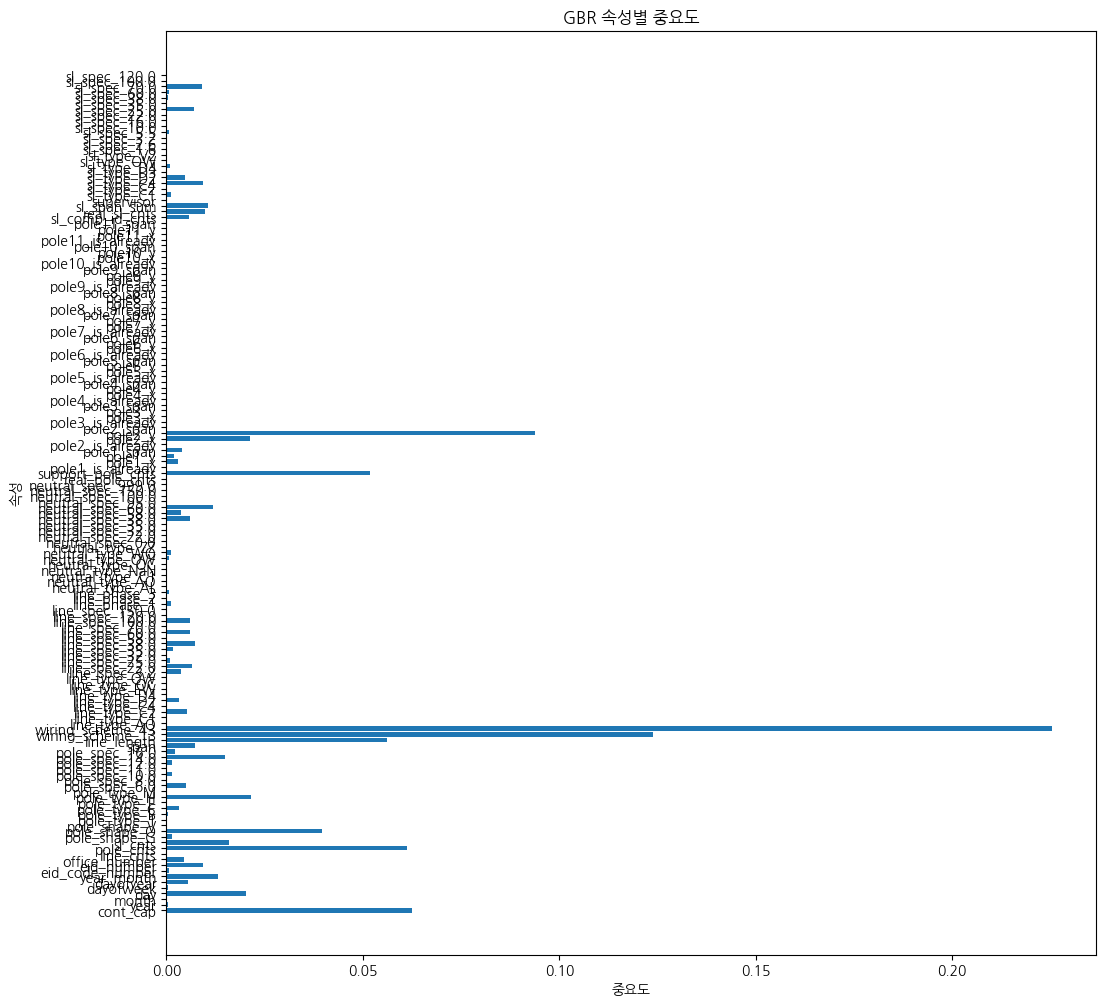

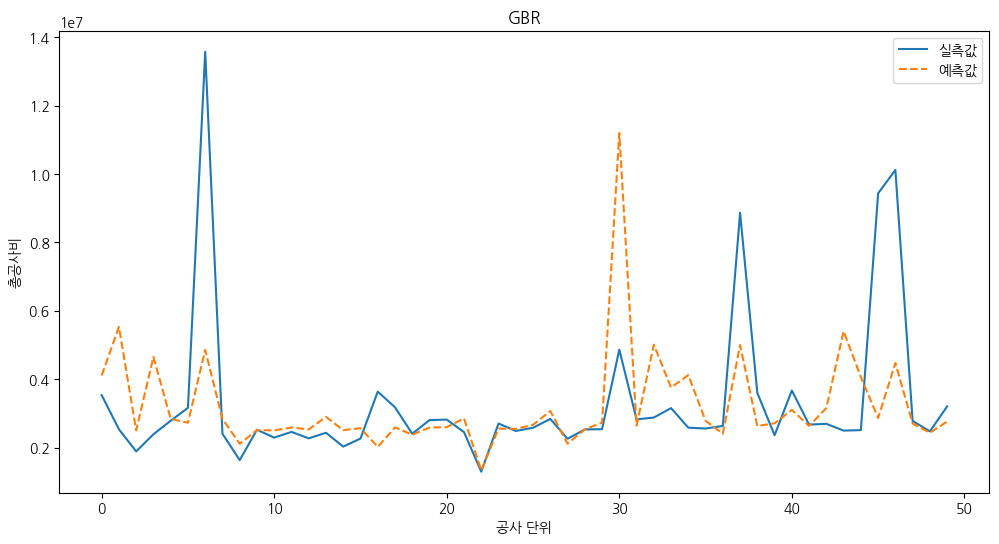

Evaluation: EN
R2_SCORE: 0.341778, MAPE: 20.432043, MSE: 2553218144237.663086, RMSE: 1597879.264600, MAE: 752155.085017
`EN` object has no attribute `feature_importances_`


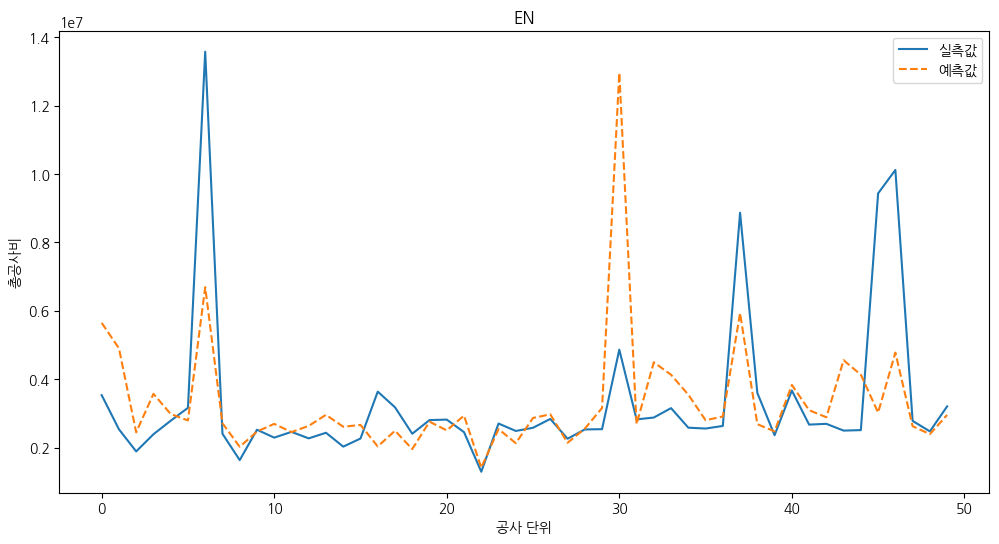

Evaluation: XGR
R2_SCORE: -0.069622, MAPE: 33.167992, MSE: 4149021122501.970215, RMSE: 2036914.608544, MAE: 1189771.628310


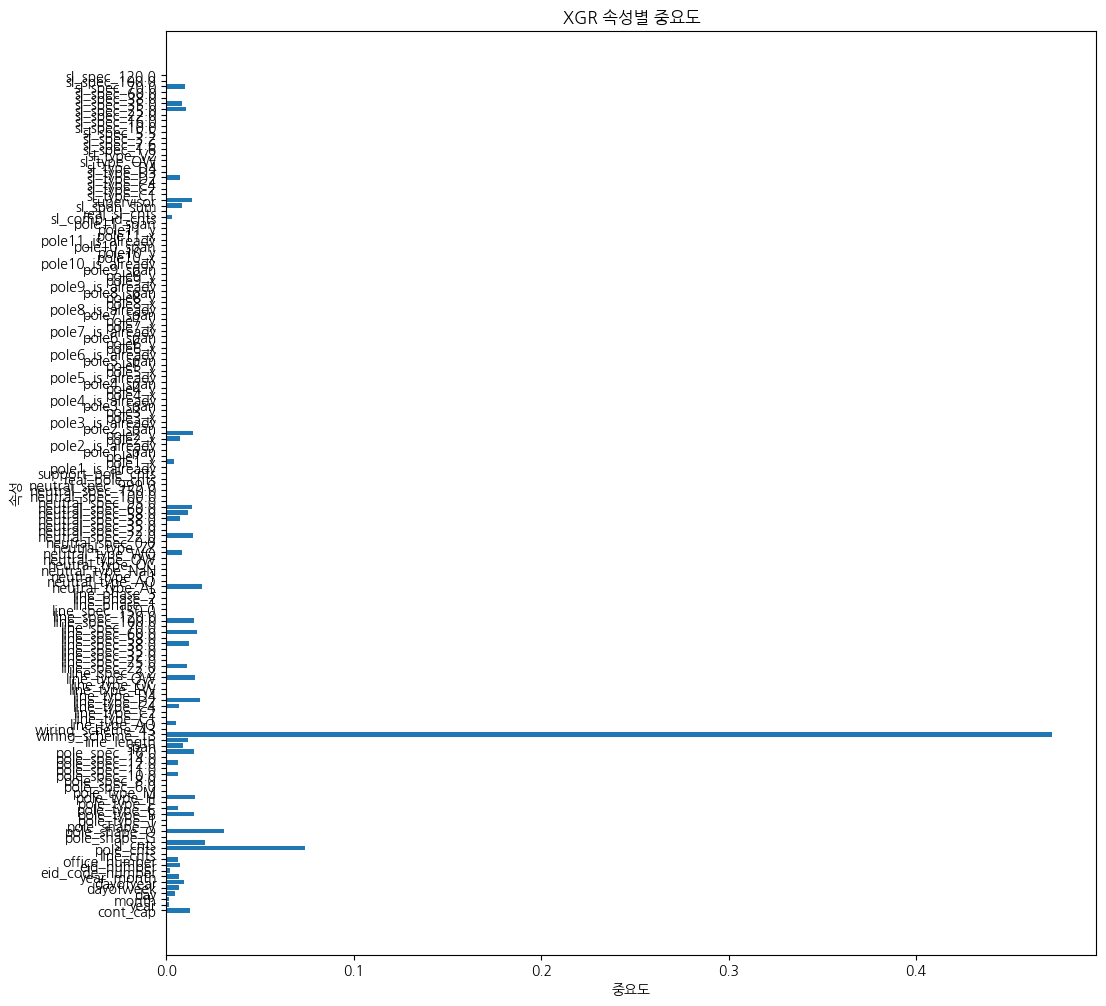

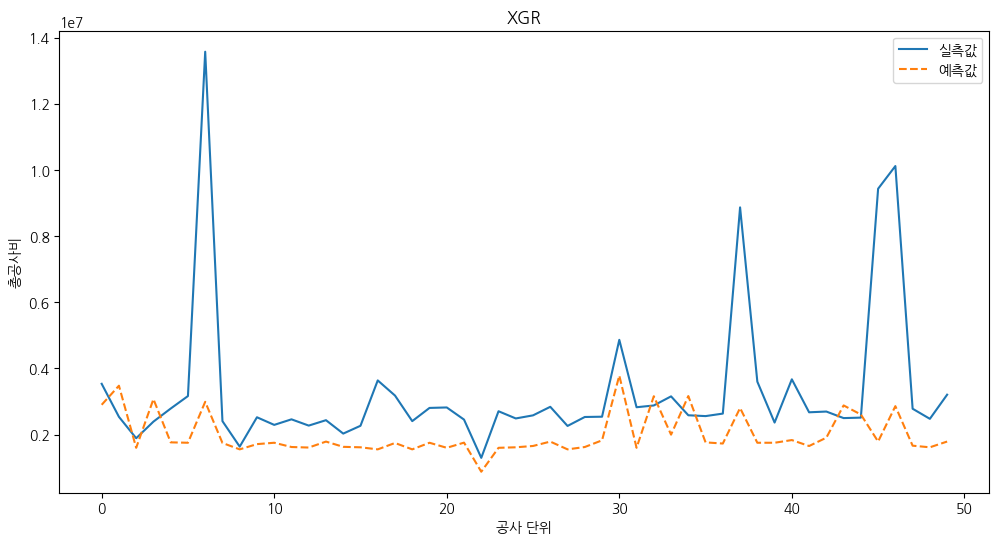

In [7]:
evaluation_values = []
model_names = []
column_names = ['r2score', 'mape', 'mse', 'rmse', 'mae']
for _model_key in ml_models.keys():
    model_fit_and_evaluation(_model_key, display_start=50, display_size=50)
    
df_evaluation = pd.DataFrame(
    evaluation_values, columns=column_names, index=model_names
)

In [8]:
df_evaluation

,r2score,mape,mse,rmse,mae
LIN,-9.120899e+25,8.749631e+10,3.537961e+38,1.880947e+19,6.561265e+17
LASSO,3.177784e-01,2.062135e-01,2.646311e+12,1.626749e+06,7.596062e+05
RIDGE,3.231939e-01,2.061210e-01,2.625305e+12,1.620279e+06,7.585754e+05
KNR,2.430521e-01,2.153954e-01,2.936171e+12,1.713526e+06,8.088522e+05
DTR,-5.360030e-01,2.807736e-01,5.958096e+12,2.440921e+06,1.037031e+06
RFR,3.426639e-01,2.048379e-01,2.549781e+12,1.596804e+06,7.559932e+05
GBR,4.015109e-01,1.995612e-01,2.321516e+12,1.523652e+06,7.247166e+05
EN,3.417779e-01,2.043204e-01,2.553218e+12,1.597879e+06,7.521551e+05
XGR,-6.962168e-02,3.316799e-01,4.149021e+12,2.036915e+06,1.189772e+06
